# K means clustering

# What we want to achieve 
segment the customer based on RFM so that company can target its customer efficiently 

# R(Recency): Number of days since last purchase 
F(Frequency): Number of transactions
M(Monetary): Total amount of transaction(revennue contributed)

In [1]:
# import required libraries for clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

In [2]:
retail=pd.read_csv('OnlineRetail.csv.zip',sep=",",encoding="ISO-8859-1",header=0)


In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
retail.shape

(541909, 8)

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Cleaning

In [6]:
# calculating the missing value % contributio in df

df_null=round(100*(retail.isnull().sum())/len(retail),2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
# droping rows having missing values 

retail=retail.dropna()
retail.shape

(406829, 8)

In [8]:
# changing the datatype of Customer ID 

retail['CustomerID']=retail['CustomerID'].astype(str)

In [9]:
# new attribute monetory 

retail['Amount']=retail['Quantity']*retail['UnitPrice']
rfm_m=retail.groupby('CustomerID')['Amount'].sum()
rfm_m=rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [10]:
# new attribute:Frequency
rfm_f=retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f=rfm_f.reset_index()
rfm_f.columns=['CustomerID','Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [11]:
# merging with two df
rfm=pd.merge(rfm_m,rfm_f,on='CustomerID',how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [12]:
# new attribute :recency
# convert datatype to proper datatype
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'],format='%m/%d/%Y %H:%M')

In [13]:

# compute the maximum date to hoe to last trabsaction date 
max_date=max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [14]:
# compute the difference between between max date and transaction date 
retail['Diff']=max_date-retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [15]:
# compute recency of customer 
rfm_p=retail.groupby('CustomerID')['Diff'].min()
rfm_p=rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [16]:
#extract number of days only
rfm_p['Diff']=rfm_p['Diff'].dt.days
rfm_p

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [17]:
# merge the dataframes to get the first RPM transform
rfm=pd.merge(rfm,rfm_p,on='CustomerID',how='inner')
rfm.columns=['CustomerID','Amount','Frequency','Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

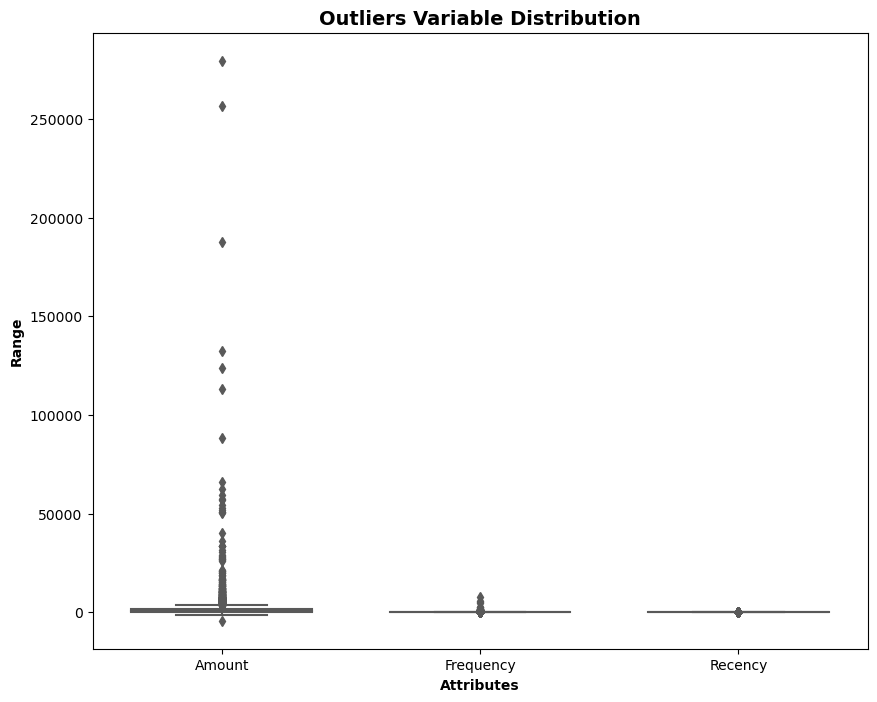

In [18]:
# outlier analysis of amount frequency and recency
attributes=['Amount','Frequency','Recency']
plt.rcParams['figure.figsize']=[10,8]
sns.boxplot(data=rfm[attributes],orient="v",palette="Set2",whis=1.5,saturation=1,width=0.7)
plt.title("Outliers Variable Distribution",fontsize=14,fontweight="bold")
plt.ylabel("Range",fontweight="bold")
plt.xlabel("Attributes",fontweight="bold")

In [19]:
# Removing the statistical outlier for amount
Q1=rfm.Amount.quantile(0.05)
Q3=rfm.Amount.quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.Amount>=Q1-1.5*IQR)&(rfm.Amount<=Q3+1.5*IQR)]

# removing statistical oulier from recency
Q1=rfm.Recency.quantile(0.05)
Q3=rfm.Recency.quantile(0.95)
TQR=Q3-Q1
rfm=rfm[(rfm.Recency>=Q1-1.5*IQR)&(rfm.Recency<=Q3+1.5*IQR)]


# removing statistical oulier from frequency
Q1=rfm.Frequency.quantile(0.05)
Q3=rfm.Frequency.quantile(0.95)
TQR=Q3-Q1
rfm=rfm[(rfm.Frequency>=Q1-1.5*IQR)&(rfm.Frequency<=Q3+1.5*IQR)]

# Scaling the feature

In [32]:
rfm_df=rfm[['Amount','Frequency','Recency']]

# instantiate
scaler=StandardScaler()

# fit_transform
rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4313, 3)

In [36]:
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
# rfm_df_scaled
rfm_df_scaled.columns=['Amount','Frequency','Recency']

# Model Building

In [39]:
# k- means with some arbitary
Kmeans=KMeans(n_clusters=4,max_iter=50)
Kmeans.fit(rfm_df_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=4)

In [46]:
Kmeans.labels_                                                

array([2, 1, 0, ..., 0, 3, 0])

In [48]:
set(Kmeans.labels_)

{0, 1, 2, 3}

# Elbow curve to get the right number of curve

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

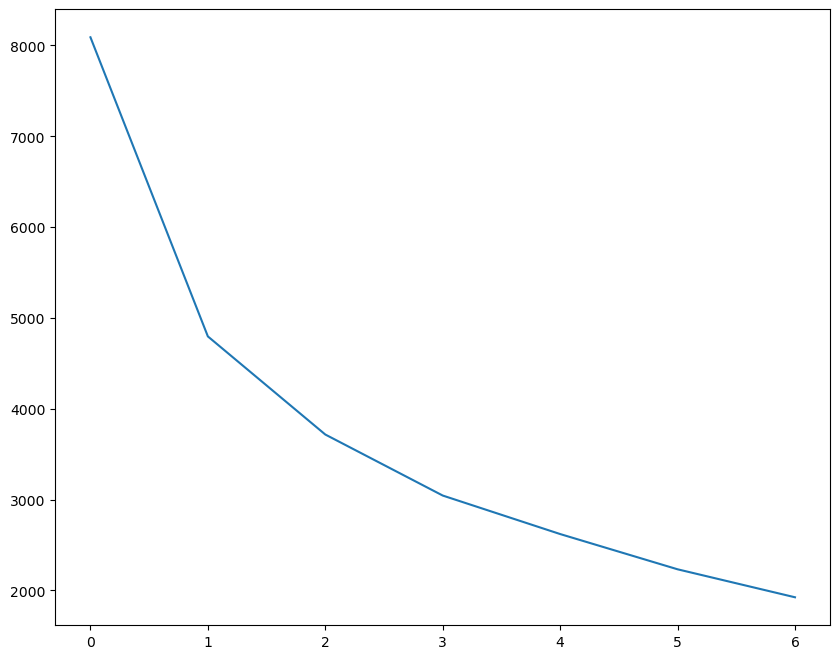

In [55]:
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    Kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    Kmeans.fit(rfm_df_scaled)
    
    ssd.append(Kmeans.inertia_)
    
# plot the ssd for n cluster
plt.plot(ssd)

In [61]:
# final model with K=3
Kmeans=KMeans(n_clusters=3,max_iter=300)
Kmeans.fit(rfm_df_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [67]:
import pickle
# Define the file name for a pickle file
filename='Kmeans_Model.pkl'

# open file in right mode

with open('Kmeans_saved_model','wb') as file:
    # save kmeans model to the file
    pickle.dump(Kmeans,file)
    
# close the file
file.close()
pickle.dump(Kmeans,open('Kmeans_model','wb'))